# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Konfigurasi plot
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Pastikan file heart.csv sudah ada di folder /content/ atau local directory
try:
    df = pd.read_csv('../heart_failure_raw/heart.csv') # Sesuaikan path jika di Colab
except:
    df = pd.read_csv('heart.csv')

print("Data Shape:", df.shape)
df.head()

Data Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0

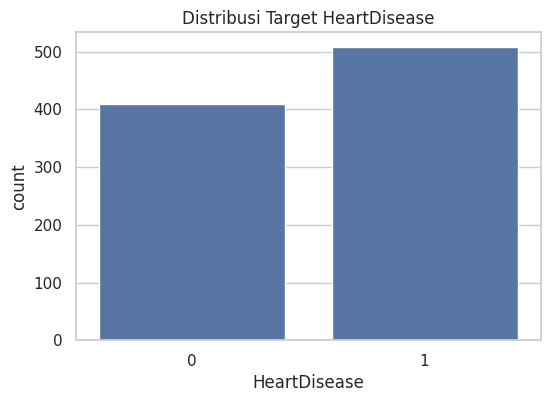

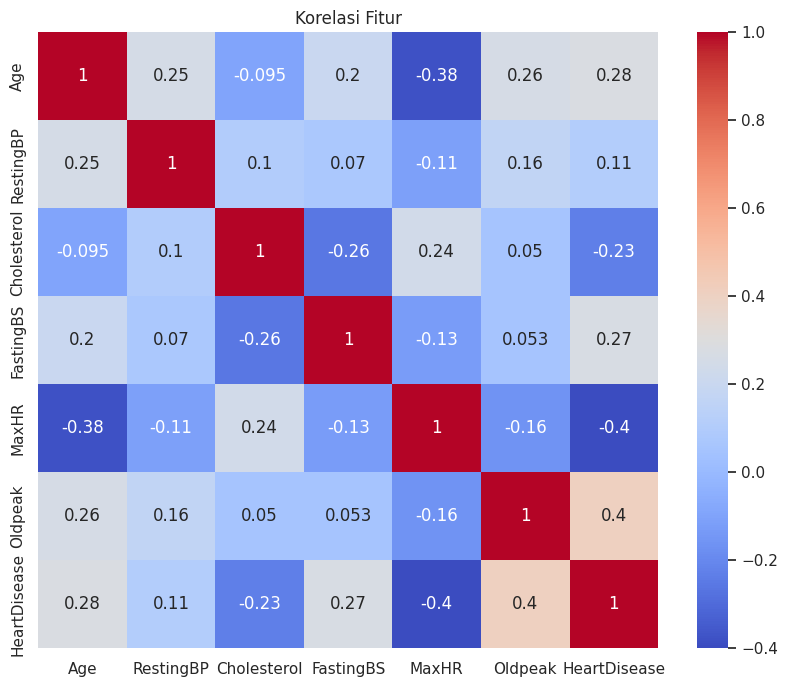

In [ ]:
# Cek Info dan Missing Value
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Cek Duplikasi
print("\nJumlah Duplikasi:", df.duplicated().sum())

# Visualisasi Target (Imbalance Check)
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Target HeartDisease')
plt.show()

# Korelasi (Hanya kolom numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

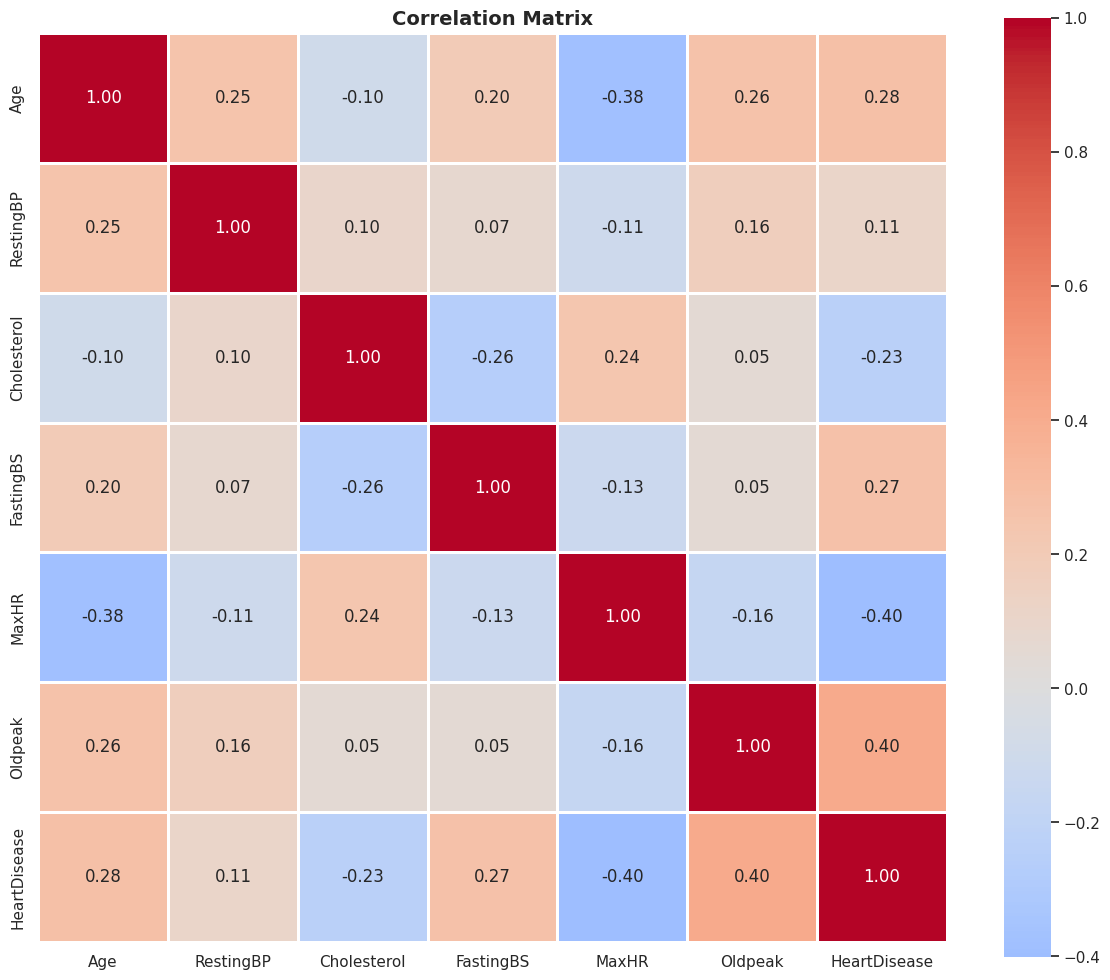


🎯 Top Features Correlated with Target:
Oldpeak        0.403951
Age            0.282039
FastingBS      0.267291
RestingBP      0.107589
Cholesterol   -0.232741
Name: HeartDisease, dtype: float64


In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 Top Features Correlated with Target:")
target_corr = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(target_corr[1:6])



Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


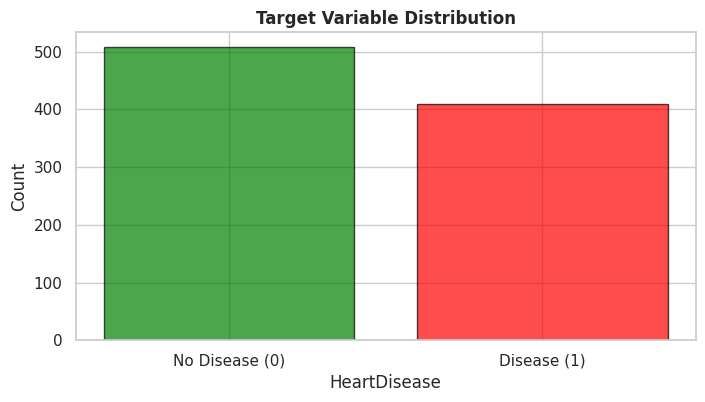

Class imbalance: 55.3% positive


In [ ]:
print("\nTarget Variable Distribution:")
print(df['HeartDisease'].value_counts())

plt.figure(figsize=(8, 4))
plt.bar(df['HeartDisease'].unique(), df['HeartDisease'].value_counts().values,
        color=['green', 'red'], alpha=0.7, edgecolor='black')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Target Variable Distribution', fontweight='bold')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])
plt.show()

print(f"Class imbalance: {(df['HeartDisease']==1).mean()*100:.1f}% positive")


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# 1. Hapus Duplikat
df_clean = df.drop_duplicates()

# 2. Encoding Kategorikal
# Pisahkan kolom
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# One Hot Encoding manual dengan Pandas (sesuai syarat manual experimentation)
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=False)

# 3. Scaling Numerik
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Cek hasil akhir
print("Shape setelah preprocessing:", df_encoded.shape)
df_encoded.head()

# Simpan hasil eksperimen manual (opsional, untuk bukti)
# df_encoded.to_csv('manual_preprocessed.csv', index=False)

Shape setelah preprocessing: (918, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
df_processed = df_clean.copy()

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\nEncoding {len(categorical_cols)} categorical columns...")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"  ✓ {col}")

print("\n✓ Categorical encoding complete")



Encoding 5 categorical columns...
  ✓ Sex
  ✓ ChestPainType
  ✓ RestingECG
  ✓ ExerciseAngina
  ✓ ST_Slope

✓ Categorical encoding complete


In [ ]:
# Separate features and target
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Variable Shape: {y.shape}")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaling applied:")
print(f"  Before: [{X.iloc[:, 0].min():.2f}, {X.iloc[:, 0].max():.2f}]")
print(f"  After: [{X_scaled_df.iloc[:, 0].min():.2f}, {X_scaled_df.iloc[:, 0].max():.2f}]")
print("\n✓ Feature scaling complete")


Feature Matrix Shape: (918, 11)
Target Variable Shape: (918,)

Scaling applied:
  Before: [28.00, 77.00]
  After: [-2.71, 2.49]

✓ Feature scaling complete


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Train-Test Split (80-20):")
print(f"\nTraining Set:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  Positive class: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")

print(f"\nTest Set:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  Positive class: {(y_test==1).sum()} ({(y_test==1).mean()*100:.1f}%)")

print("\n✓ Train-test split complete")



📊 Train-Test Split (80-20):

Training Set:
  X_train: (734, 11)
  y_train: (734,)
  Positive class: 406 (55.3%)

Test Set:
  X_test: (184, 11)
  y_test: (184,)
  Positive class: 102 (55.4%)

✓ Train-test split complete


In [ ]:
import os
os.makedirs('data_preprocessing', exist_ok=True)

# Save preprocessed data
X_train.to_csv('data_preprocessing/X_train.csv', index=False)
X_test.to_csv('data_preprocessing/X_test.csv', index=False)
y_train.to_csv('data_preprocessing/y_train.csv', index=False, header=['target'])
y_test.to_csv('data_preprocessing/y_test.csv', index=False, header=['target'])

print("✓ Preprocessed data saved:")
print(f"  - X_train.csv ({X_train.shape})")
print(f"  - X_test.csv ({X_test.shape})")
print(f"  - y_train.csv ({y_train.shape})")
print(f"  - y_test.csv ({y_test.shape})")

# Download files
from google.colab import files
files.download('data_preprocessing/X_train.csv')
files.download('data_preprocessing/X_test.csv')
files.download('data_preprocessing/y_train.csv')
files.download('data_preprocessing/y_test.csv')

print("\n✓ Files ready for download!")


✓ Preprocessed data saved:
  - X_train.csv ((734, 11))
  - X_test.csv ((184, 11))
  - y_train.csv ((734,))
  - y_test.csv ((184,))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ Files ready for download!
